# Multiclass classification to predict the Efficacy of an active G9a inhibitor using data_set_3
https://scikit-learn.org/stable/modules/multiclass.html

### Content   <a name="content"></a>

1. [Data loading and observations](#1)
2. [Dividing the range of efficacy into four classes](#2)
3. [Balancing data ](#3)
4. [ML with Random Forest Classifier](#4)
5. [Overfitting exploration](#5)
6. [Feature importance. Two methods comparison](#6)
7. [Final result](#7)

## Data loading and observations <a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_Efficacy_with_solub_and_imputation.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (5310, 61)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
0,125.832,337.40,94.2,22.9,24,1,5,5,1,7.4631,8.6021,19.963043,19.881405,10.1174,11.2860,20.047873,20.324161,1.235937,2.285504e-03,9.8034,12.2149,19.935856,19.808128,6.1795,8.7580,20.405029,20.203442,3.1598,4.9744,19.952756,19.824369,127.312374,21.047793,20.379100,20.585478,0.44,0.38,0.03,0.03,0.13,0.0,0.00,0.0,60.52,4.48,4.74,9.50,20.76,0.0,0.00,0.0,20.737650,20.762192,1.586439,1.394713,3.102538,2.455552,1.955662,1.760614,20.045,22.200000
1,159.927,391.50,145.0,23.2,25,1,7,4,1,13.3389,13.3389,19.986803,19.931411,9.3818,9.3818,19.996973,19.950942,0.000000,2.283697e-09,13.3236,15.4208,20.054043,20.208981,5.1669,7.5494,20.607818,20.344061,2.3667,4.2663,19.237999,19.434229,90.088600,20.405571,20.041752,20.316693,0.42,0.34,0.08,0.08,0.08,0.0,0.00,0.0,49.09,3.35,12.26,24.57,10.73,0.0,0.00,0.0,21.421785,21.421785,2.578645,2.042652,5.629611,3.614561,2.183166,1.769543,20.049,17.960556
2,154.866,293.34,78.7,21.6,20,0,4,5,1,10.3905,11.4264,20.051936,19.758394,5.2570,7.9578,19.523062,19.353399,38.342612,4.282801e-01,10.1478,13.3207,19.611802,19.984691,4.2735,5.6810,19.471141,19.557996,2.3743,4.2323,19.915592,19.927372,68.849533,20.104155,20.202745,20.029847,0.40,0.43,0.11,0.03,0.03,0.0,0.00,0.0,57.32,5.15,21.82,10.93,4.78,0.0,0.00,0.0,21.976508,21.435874,2.374588,2.344781,4.274018,3.147390,1.799899,1.342296,20.036,21.000000
3,133.107,330.40,92.5,22.5,23,1,4,5,1,10.8520,11.8925,19.840402,20.131367,9.0951,9.0951,20.183336,19.753316,0.083054,2.191694e-04,10.2961,11.5105,20.177121,19.972704,6.6456,8.9003,19.247888,19.638222,2.7422,4.8784,20.251344,20.075438,34.212505,20.028410,20.175722,20.149538,0.39,0.44,0.05,0.02,0.10,0.0,0.00,0.0,58.16,5.49,9.68,9.70,16.96,0.0,0.00,0.0,21.193170,21.307572,1.549311,1.293271,3.754686,2.359483,2.423456,1.824430,20.044,24.000000
4,140.597,318.78,107.0,22.1,20,1,5,7,1,14.0384,14.0384,20.469512,20.179811,3.0000,4.2000,20.946284,20.171131,0.195432,1.260465e-01,13.1925,14.8555,20.502508,19.944113,2.4826,5.4797,19.864594,19.969737,1.6693,3.3826,20.327390,19.912363,72.921198,20.950873,20.731400,20.737462,0.34,0.43,0.11,0.03,0.06,0.0,0.03,0.0,45.21,4.74,20.08,10.06,8.79,0.0,11.12,0.0,24.679467,23.342476,5.313985,2.711006,7.903013,4.391740,1.487210,1.619967,20.062,38.000000


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5310 entries, 0 to 5309
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Efficacy              5310 non-null   float64
 1   MW                    5310 non-null   float64
 2   TPSA                  5310 non-null   float64
 3   XL                    5310 non-null   float64
 4   HAC                   5310 non-null   int64  
 5   HBDC                  5310 non-null   int64  
 6   HBAC                  5310 non-null   int64  
 7   RBC                   5310 non-null   int64  
 8   CBUC                  5310 non-null   int64  
 9   MMX6                  5310 non-null   float64
 10  MMX                   5310 non-null   float64
 11  SX6                   5310 non-null   float64
 12  SX                    5310 non-null   float64
 13  MMY6                  5310 non-null   float64
 14  MMY                   5310 non-null   float64
 15  SY6                   5310

In [5]:
df.describe(include="all")

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.00000,5310.000000,5310.000000,5310.0,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000
mean,132.303232,318.748822,83.631141,22.849887,22.181544,1.30904,4.545009,3.987194,1.0,9.980930,10.638028,20.025677,20.023534,8.484624,9.080851,19.958309,19.981974,7.966257e+00,4.763825e-02,10.533911,12.595858,20.009314,20.010952,4.925638,6.966872,19.997542,19.997589,2.490603,4.254746,19.997092,19.996234,6.585178e+01,20.456086,20.786708,20.686421,0.415151,0.416859,0.061030,0.018341,0.077763,0.001254,0.005030,0.004026,60.265209,5.193456,11.476819,6.577866,12.830546,0.929772,1.856098,0.869004,21.412148,21.341961,2.403163,1.905538,128.815280,46.216479,57.200504,25.956369,20.056296,22.695919
std,29.454276,65.295436,33.077178,1.212785,4.661594,0.93868,1.699099,1.970738,0.0,3.176329,3.033890,0.309775,0.275619,3.177327,3.022290,0.369285,0.308950,4.684151e+01,2.663324e-01,2.617596,2.542500,0.325410,0.269524,1.674206,1.595347,0.445613,0.302368,1.205858,1.397154,0.581832,0.401475,8.436849e+01,1.556059,10.335110,9.981879,0.045254,0.065098,0.041377,0.021524,0.039467,0.006542,0.014332,0.016056,9.334322,1.465328,7.328094,7.222684,5.967911,4.682500,4.959285,3.208269,0.965442,0.695266,1.091181,0.600540,886.766056,493.796310,424.076048,294.237612,0.019294,15.055321
min,62.000400,97.070000,0.000000,16.100000,6.000000,0.00000,0.000000,0.000000,1.0,0.714500,2.057200,18.627042,19.106138,0.412500,1.237500,18.657621,18.928861,0.000000e+00,2.260095e-38,1.128300,4.589300,18.534780,18.885661,0.394700,2.878500,17.909794,18.886292,0.000300,0.000500,16.402595,14.612511,3.807599e-07,20.000129,20.000000,20.000007,0.150000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.830000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.576067,0.798337,1.002917,0.908398,0.260297,0.683794,20.011000,0.100000
25%,111.725750,278.355000,60.800000,22.100000,19.000000,1.00000,3.000000,3.000000,1.0,7.696800,8.580400,19.832558,19.849264,6.273825,6.847100,19.721393,19.776828,1.579800e-18,3.129307e-06,8.713775,10.770700,19.811826,19.839129,3.622100,5.737850,19.729997,19.814467,1.753600,3.494425,19.729226,19.822847,2.824164e+01,20.058451,20.042552,20.042288,0.380000,0.380000,0.030000,0.000000,0.050000,0.000000,0.000000,0.000000,54.095000,4.170000,5.650000,0.000000,8.740000,0.000000,0.000000,0.000000,20.822175,20.843565,1.602426,1.443007,3.091459,2.309794,1.458390,1.317562,20.047000,12.700000
50%,130.844000,313.350000,81.300000,22.900000,22.000000,1.00000,4.000000,4.000000,1.0,9.869550,10.218900,20.007891,20.006990,8.255250,8.934250,19.972450,19.980779,8.281494e-02,3.121274e-04,10.377850,12.402600,20.004781,20.011891,4.799500,6.791200,19.999961,20.000069,2.483100,4.350600,19.999096,19.999072,4.485270e+01,20.149898,20.111048,20.110732,0.420000,0.420000,0.060000,0.020000,0.070000,0.000000,0.000000,0.000000,60.535000,5.085000,11.14000

[<a href="#content">Back to top</a>]

## Dividing the range of efficacy into four classes <a name="2"></a>

In [6]:
# Efficacy min 31.1299
# Efficacy max 299.718
# Difference 268.5881
# 4 classes distinct by 67: from 31.1299 to 98; 165; 232; 299.718
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/#:~:text=To%20accomplish%20this%2C%20we%E2%80%99ll%20use%20numpy%E2%80%99s%20built-in%20where%28%29,condition%20is%20true%2C%20value%20if%20condition%20is%20false%29
import numpy as np

# Create a list of conditions
conditions = [
    (df['Efficacy'] <= 98),
    (df['Efficacy'] >98) & (df['Efficacy']<=165),
    (df['Efficacy'] >165) & (df['Efficacy']<=232),
    (df['Efficacy'] >232)
]

# Create a lsit of values
values = ['1', '2', '3', '4']

# Create a new column and use np.select to assign values to it using the lists as arguments
df['target'] = np.select(conditions, values)

# display the updated DataFrame
df.head() 

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,target
0,125.832,337.40,94.2,22.9,24,1,5,5,1,7.4631,8.6021,19.963043,19.881405,10.1174,11.2860,20.047873,20.324161,1.235937,2.285504e-03,9.8034,12.2149,19.935856,19.808128,6.1795,8.7580,20.405029,20.203442,3.1598,4.9744,19.952756,19.824369,127.312374,21.047793,20.379100,20.585478,0.44,0.38,0.03,0.03,0.13,0.0,0.00,0.0,60.52,4.48,4.74,9.50,20.76,0.0,0.00,0.0,20.737650,20.762192,1.586439,1.394713,3.102538,2.455552,1.955662,1.760614,20.045,22.200000,2
1,159.927,391.50,145.0,23.2,25,1,7,4,1,13.3389,13.3389,19.986803,19.931411,9.3818,9.3818,19.996973,19.950942,0.000000,2.283697e-09,13.3236,15.4208,20.054043,20.208981,5.1669,7.5494,20.607818,20.344061,2.3667,4.2663,19.237999,19.434229,90.088600,20.405571,20.041752,20.316693,0.42,0.34,0.08,0.08,0.08,0.0,0.00,0.0,49.09,3.35,12.26,24.57,10.73,0.0,0.00,0.0,21.421785,21.421785,2.578645,2.042652,5.629611,3.614561,2.183166,1.769543,20.049,17.960556,2
2,154.866,293.34,78.7,21.6,20,0,4,5,1,10.3905,11.4264,20.051936,19.758394,5.2570,7.9578,19.523062,19.353399,38.342612,4.282801e-01,10.1478,13.3207,19.611802,19.984691,4.2735,5.6810,19.471141,19.557996,2.3743,4.2323,19.915592,19.927372,68.849533,20.104155,20.202745,20.029847,0.40,0.43,0.11,0.03,0.03,0.0,0.00,0.0,57.32,5.15,21.82,10.93,4.78,0.0,0.00,0.0,21.976508,21.435874,2.374588,2.344781,4.274018,3.147390,1.799899,1.342296,20.036,21.000000,2
3,133.107,330.40,92.5,22.5,23,1,4,5,1,10.8520,11.8925,19.840402,20.131367,9.0951,9.0951,20.183336,19.753316,0.083054,2.191694e-04,10.2961,11.5105,20.177121,19.972704,6.6456,8.9003,19.247888,19.638222,2.7422,4.8784,20.251344,20.075438,34.212505,20.028410,20.175722,20.149538,0.39,0.44,0.05,0.02,0.10,0.0,0.00,0.0,58.16,5.49,9.68,9.70,16.96,0.0,0.00,0.0,21.193170,21.307572,1.549311,1.293271,3.754686,2.359483,2.423456,1.824430,20.044,24.000000,2
4,140.597,318.78,107.0,22.1,20,1,5,7,1,14.0384,14.0384,20.469512,20.179811,3.0000,4.2000,20.946284,20.171131,0.195432,1.260465e-01,13.1925,14.8555,20.502508,19.944113,2.4826,5.4797,19.864594,19.969737,1.6693,3.3826,20.327390,19.912363,72.921198,20.950873,20.731400,20.737462,0.34,0.43,0.11,0.03,0.06,0.0,0.03,0.0,45.21,4.74,20.08,10.06,8.79,0.0,11.12,0.0,24.679467,23.342476,5.313985,2.711006,7.903013,4.391740,1.487210,1.619967,20.062,38.000000,2


In [7]:
df['target'].value_counts()

target
2    3970
3     662
1     657
4      21
Name: count, dtype: int64

In [8]:
df.shape

(5310, 62)

[<a href="#content">Back to top</a>]

## Balancing data  <a name="3"></a>

In [9]:
# Split the training columns from the columns with the targets
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[('1', 657), ('2', 3970), ('3', 662), ('4', 21)]


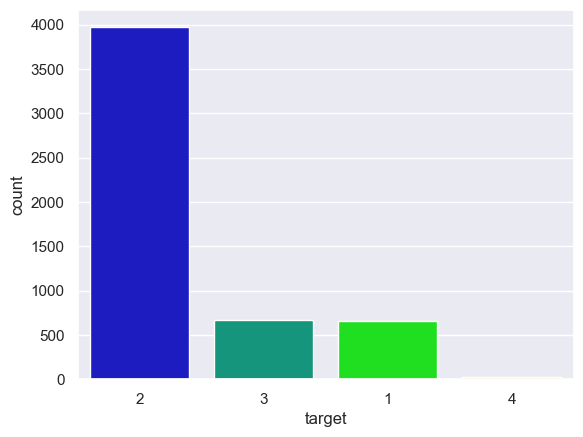

In [10]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

[('1', 3970), ('2', 3970), ('3', 3970), ('4', 3970)]


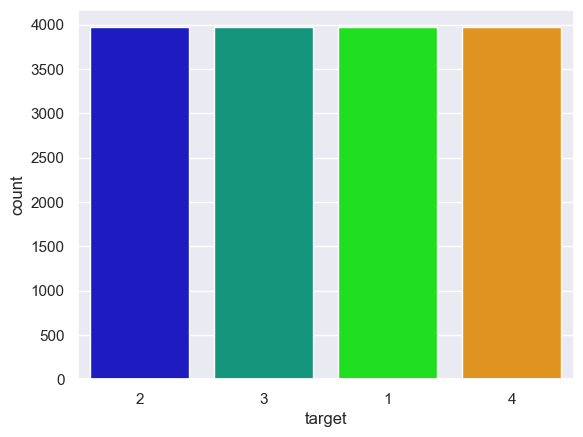

In [11]:
from imblearn.over_sampling import SMOTE

# Balance targets with Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

# Illustrate the balance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## ML with Random Forest Classifier <a name="4"></a>

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                                      test_size=0.20,
                                                                      random_state=5, 
                                                                      shuffle=True) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (12704, 60)
X_test:   (3176, 60)
y_train:  (12704,)
y_test:   (3176,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, auc
from sklearn.multiclass import OneVsRestClassifier

# model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train) 
model = RandomForestClassifier(random_state=1).fit(X_train, y_train) 

pred = model.predict(X_test) 
  
print("Accuracy:", round(accuracy_score(y_test, pred),3))

Accuracy: 0.925


In [14]:
from sklearn.model_selection import cross_val_score

clf = (RandomForestClassifier(random_state=1))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores

array([0.89578086, 0.94301008, 0.93860202, 0.93041562, 0.94112091])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.02


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="5"></a>

In [16]:
from sklearn.metrics import accuracy_score

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(#max_features="log2",
                                 # max_leaf_nodes=9,
                                 # n_estimators=150,
                                 max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.441, test: 0.444
>2, train: 0.493, test: 0.495
>3, train: 0.551, test: 0.536
>4, train: 0.610, test: 0.586
>5, train: 0.680, test: 0.624
>6, train: 0.761, test: 0.701
>7, train: 0.846, test: 0.733
>8, train: 0.910, test: 0.804
>9, train: 0.954, test: 0.830
>10, train: 0.978, test: 0.860
>11, train: 0.989, test: 0.880
>12, train: 0.994, test: 0.887
>13, train: 0.997, test: 0.900
>14, train: 0.997, test: 0.906
>15, train: 0.998, test: 0.918
>16, train: 0.999, test: 0.918
>17, train: 0.999, test: 0.920
>18, train: 0.999, test: 0.914
>19, train: 1.000, test: 0.923
>20, train: 0.999, test: 0.918


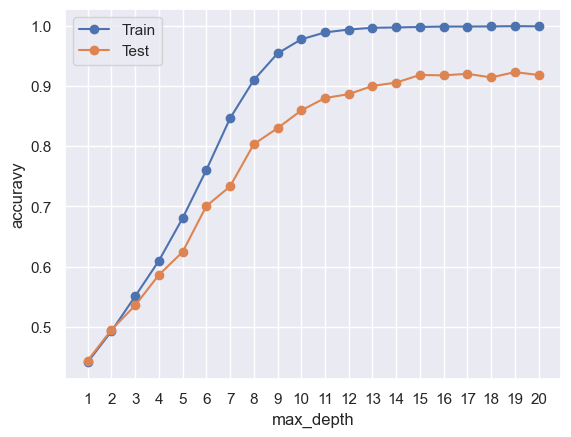

In [17]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Feature importance <a name="5"></a>

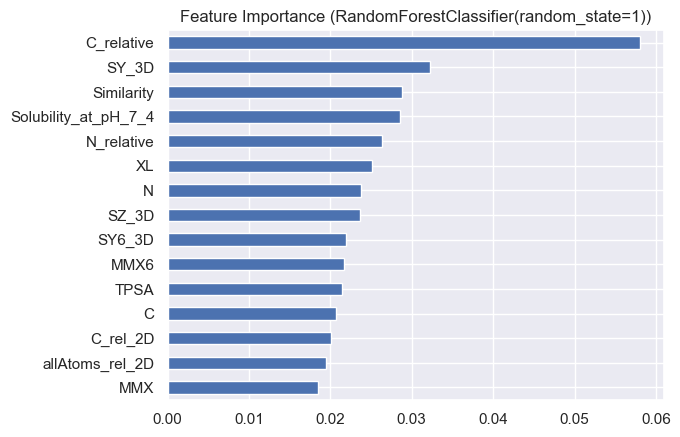

In [18]:
import matplotlib.pyplot as plt

# Define feature importance of RandomForestClassifier 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.nlargest(15).sort_values()

# Plot feature importance of RandomForestClassifier 
feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
plt.show()

Text(0.5, 0, 'Permutation Importance')

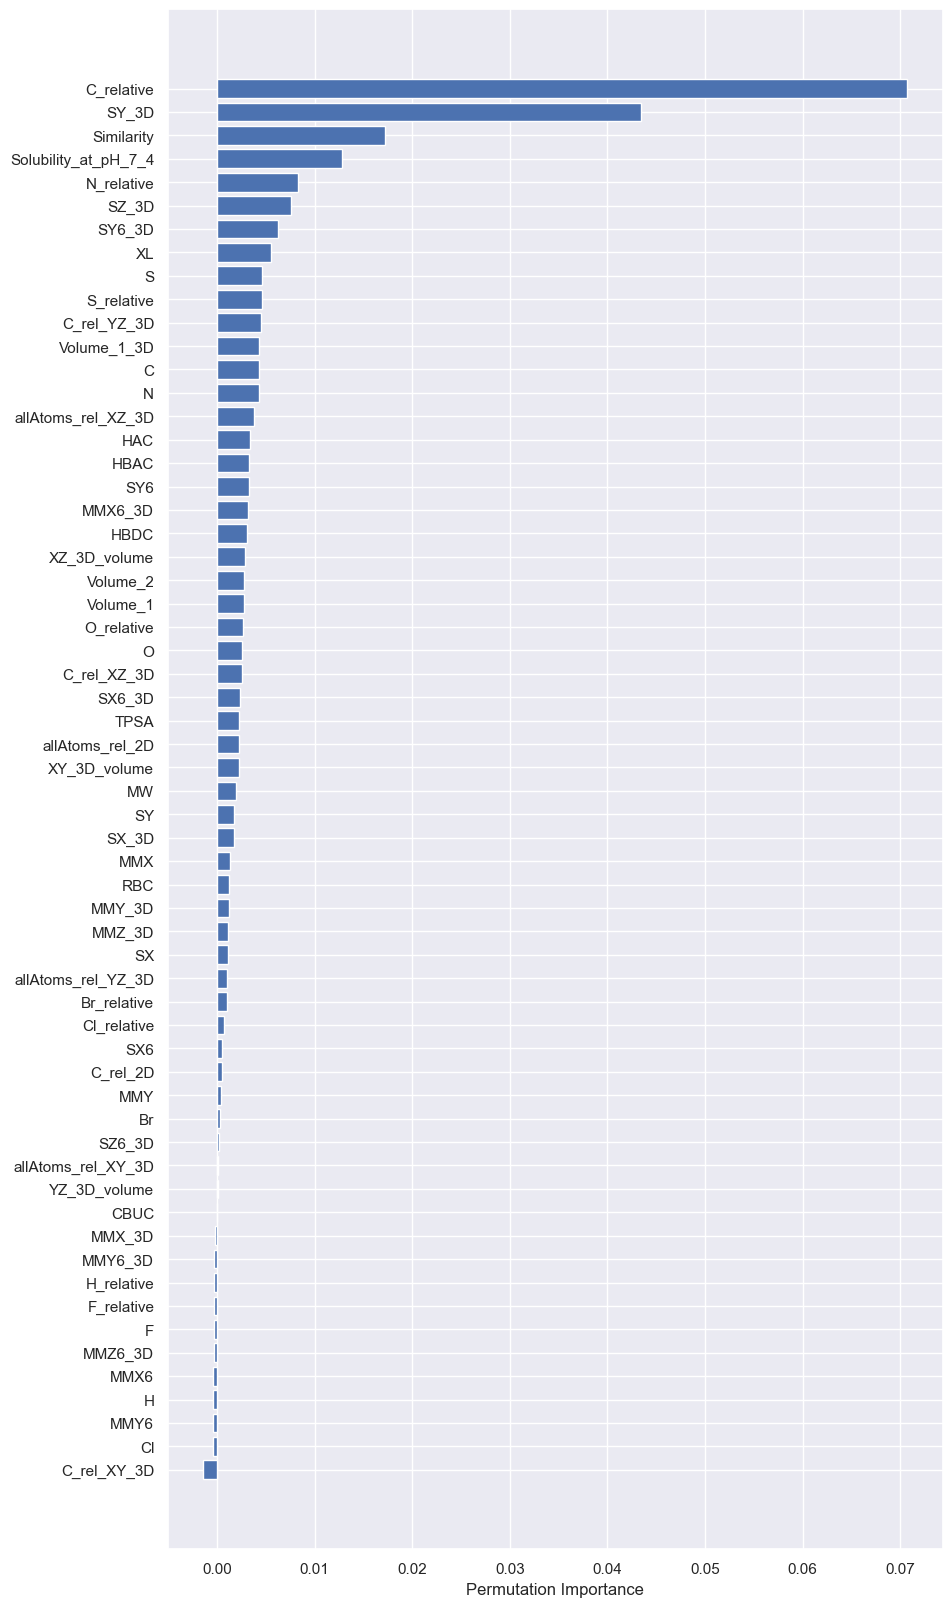

In [19]:
from sklearn.inspection import permutation_importance
import numpy as np

# Define and plot feature importance according the features` permutations
feature_names = list(X)

# Convert list into array
features = np.array(feature_names)

# Calculate the permutation importance
perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [20]:
## Run combination of different features based on comparison of the feature importance methods 
## Feature Importance   
# X = X[['C_relative',
#        'SY_3D', 
#        'Similarity',
#        'Solubility_at_pH_7_4',  
#        'XL',
#        'N_relative', 
#        'XL',                  
#        'N',         
#        'SZ_3D',
#        'SY6_3D',
#        'MMX6',
#        'TPSA'    # 0.87
#       ]]

# Permutation feature importance
X = X[['C_relative',
       'SY_3D', 
       'Similarity',
       'Solubility_at_pH_7_4',
       'SZ_3D',
       'SY6_3D',
       'N_relative',
       'XL',                        
       'N',         
       'S_relative',
       'Volume_1_3D'   # 0.8741
      ]]


# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# ML
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.8740554156171285


[<a href="#content">Back to top</a>]

## Hyperparameter tuning <a name="5"></a>

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 10, 20], 
    'max_leaf_nodes': [3, 6, 9], 
}

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
# %%time
grid_search.fit(X_train, y_train)

print("grid_search.best_score_", grid_search.best_score_)

rf_best = grid_search.best_estimator_
rf_best

grid_search.best_score_ 0.511649235994261


RandomForestClassifier(max_depth=10, max_leaf_nodes=9, n_estimators=150)

[<a href="#content">Back to top</a>]

## Overfitting detection <a name="5"></a>

In [22]:
from sklearn.metrics import accuracy_score

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.421, test: 0.420
>2, train: 0.468, test: 0.467
>3, train: 0.517, test: 0.514
>4, train: 0.571, test: 0.548
>5, train: 0.634, test: 0.599
>6, train: 0.697, test: 0.633
>7, train: 0.772, test: 0.684
>8, train: 0.837, test: 0.725
>9, train: 0.901, test: 0.769
>10, train: 0.940, test: 0.789
>11, train: 0.965, test: 0.801
>12, train: 0.979, test: 0.818
>13, train: 0.988, test: 0.835
>14, train: 0.992, test: 0.849
>15, train: 0.994, test: 0.859
>16, train: 0.996, test: 0.862
>17, train: 0.997, test: 0.865
>18, train: 0.998, test: 0.865
>19, train: 0.998, test: 0.866
>20, train: 0.999, test: 0.870


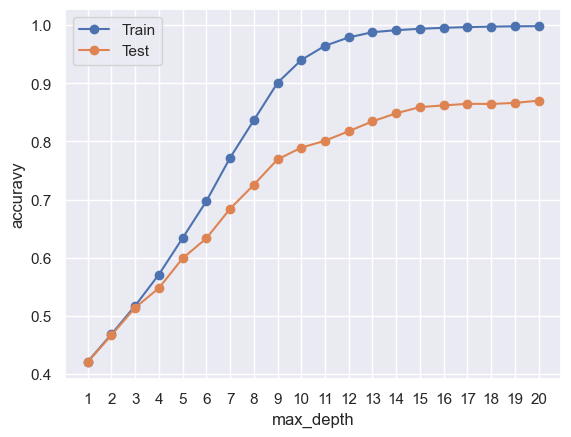

In [23]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix and classification report <a name="6"></a>

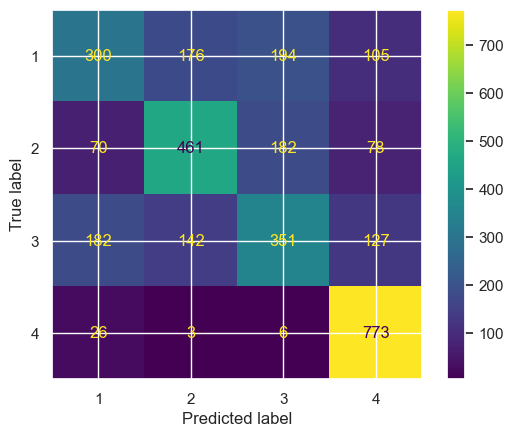

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train) 
predicted = model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, predicted) 

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1', '2', '3', '4'])
cm_display.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['1', '2', '3', '4']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

           1       0.52      0.39      0.44       775
           2       0.59      0.58      0.59       791
           3       0.48      0.44      0.46       802
           4       0.71      0.96      0.82       808

    accuracy                           0.59      3176
   macro avg       0.58      0.59      0.58      3176
weighted avg       0.58      0.59      0.58      3176



[<a href="#content">Back to top</a>]

## Printing the real and the predicted values<a name="9"></a>

In [26]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

In [27]:
# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(predicted.tolist(),columns=["Predicted Values"])

In [28]:
# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Display the resulted data frame 
final_output

,Real Values,Predicted Values
0,3,3
1,3,3
2,1,1
3,4,4
4,3,3
...,...,...
3171,2,4
3172,4,4
3173,1,2
3174,4,4


[<a href="#content">Back to top</a>]